<a href="https://colab.research.google.com/github/Ravali0726/assesment1/blob/main/py_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install requests matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Episode aired before May 2019 in Season 1 : The Original
Episode aired before May 2019 in Season 1 : Chestnut
Episode aired before May 2019 in Season 1 : The Stray
Episode aired before May 2019 in Season 1 : Dissonance Theory
Episode aired before May 2019 in Season 1 : Contrapasso
Episode aired before May 2019 in Season 1 : The Adversary
Episode with rating > 8 in Season 1 : Trompe L'Oeil
Episode aired before May 2019 in Season 1 : Trompe L'Oeil
Episode aired before May 2019 in Season 1 : Trace Decay
Episode with rating > 8 in Season 1 : The Well-Tempered Clavier
Episode aired before May 2019 in Season 1 : The Well-Tempered Clavier
Episode with rating > 8 in Season 1 : The Bicameral Mind
Episode aired before May 2019 in Season 1 : The Bicameral Mind
Episode aired before May 2019 in Season 2 : Journey Into Night
Episode aired before May 2019 in Season 2 : Reunion
Episode aired before May 2019 in Season 2 : Virtù e Fortuna
Episode aired before May 2019 in Season 2 : The Riddle of the Sph

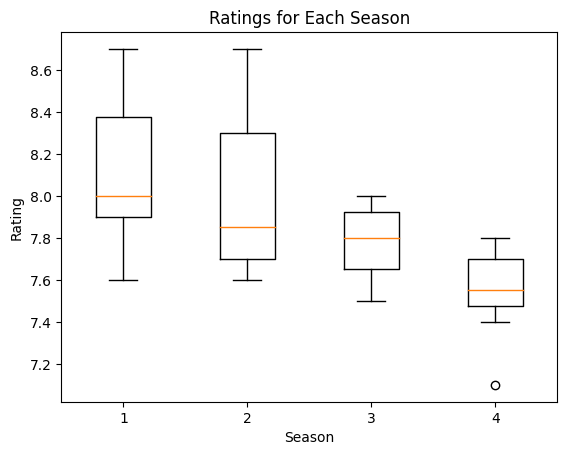

Season: 1
Episode with Highest Rating: The Bicameral Mind
Episode with Lowest Rating: The Stray
---------------------------------------
Season: 2
Episode with Highest Rating: Kiksuya
Episode with Lowest Rating: Akane No Mai
---------------------------------------
Season: 3
Episode with Highest Rating: Parce Domine
Episode with Lowest Rating: Decoherence
---------------------------------------
Season: 4
Episode with Highest Rating: Zhuangzi
Episode with Lowest Rating: The Auguries
---------------------------------------
Season: 1
Most Popular Episode: The Bicameral Mind
Rating: 8.7
---------------------------------------
Season: 2
Most Popular Episode: Kiksuya
Rating: 8.7
---------------------------------------
Season: 3
Most Popular Episode: Parce Domine
Rating: 8
---------------------------------------
Season: 4
Most Popular Episode: Zhuangzi
Rating: 7.8
---------------------------------------


In [4]:
import requests
import json
import matplotlib.pyplot as plt

# API endpoint
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API endpoint
response = requests.get(url)

# Parse the JSON response
data = json.loads(response.text)

# Extract the episodes data
episodes = data["_embedded"]["episodes"]

# Initialize dictionaries to store the analysis results
season_ratings = {}  # Overall ratings for each season
high_low_ratings = {}  # Episode names with highest and lowest rating for each season
popular_episodes = {}  # Summary of the most popular episode in each season

# Extract desired attributes and perform analysis
for episode in episodes:
    season = episode["season"]
    rating = episode["rating"]["average"]
    episode_name = episode["name"]
    airdate = episode["airdate"]

    # Calculate overall ratings for each season
    if season not in season_ratings:
        season_ratings[season] = []
    season_ratings[season].append(rating)

    # Identify episodes with average rating > 8 for each season
    if rating > 8:
        print("Episode with rating > 8 in Season", season, ":", episode_name)

    # Identify episodes aired before May 2019 for each season
    if airdate < "2019-05":
        print("Episode aired before May 2019 in Season", season, ":", episode_name)

    # Update episode names with highest and lowest rating for each season
    if season not in high_low_ratings:
        high_low_ratings[season] = {"highest": {"name": episode_name, "rating": rating},
                                    "lowest": {"name": episode_name, "rating": rating}}
    else:
        if rating > high_low_ratings[season]["highest"]["rating"]:
            high_low_ratings[season]["highest"]["name"] = episode_name
            high_low_ratings[season]["highest"]["rating"] = rating
        if rating < high_low_ratings[season]["lowest"]["rating"]:
            high_low_ratings[season]["lowest"]["name"] = episode_name
            high_low_ratings[season]["lowest"]["rating"] = rating

    # Update summary of the most popular episode in each season
    if season not in popular_episodes:
        popular_episodes[season] = {"episode": episode_name, "rating": rating}
    else:
        if rating > popular_episodes[season]["rating"]:
            popular_episodes[season]["episode"] = episode_name
            popular_episodes[season]["rating"] = rating

# Plotting the ratings for each season
seasons = list(season_ratings.keys())
ratings = [season_ratings[season] for season in seasons]

plt.boxplot(ratings, labels=seasons)
plt.title("Ratings for Each Season")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.show()

# Print the episode names with the highest and lowest rating for each season
for season in high_low_ratings:
    print("Season:", season)
    print("Episode with Highest Rating:", high_low_ratings[season]["highest"]["name"])
    print("Episode with Lowest Rating:", high_low_ratings[season]["lowest"]["name"])
    print("---------------------------------------")

# Print the summary of the most popular episode in each season
for season in popular_episodes:
    print("Season:", season)
    print("Most Popular Episode:", popular_episodes[season]["episode"])
    print("Rating:", popular_episodes[season]["rating"])
    print("---------------------------------------")
